In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from os.path import join
PROJ_path = '/content/drive/MyDrive/Colab Notebooks/Colab'
%cd "{PROJ_path}"
%pwd

/content/drive/MyDrive/Colab Notebooks/Colab


'/content/drive/MyDrive/Colab Notebooks/Colab'

In [3]:
!git config user.email "jjunnew@gmail.com"
!git config user.name "yujin jeon"

In [4]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   10_XGBoost_couple_matching_expectation.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Colab/
	Untitled0.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [6]:
!git add 10_XGBoost_couple_matching_expectation.ipynb
!git commit -m 'feat: XGboost third commit'
!git push origin main

[main 865cd13] feat: XGboost third commit
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.10 KiB | 124.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/yujinjeon-kr/Colab.git
   8e8d108..865cd13  main -> main


# 10.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url) # 데이터셋 읽기
data.head()


,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [ ]:
data.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match'],
      dtype='object')

In [ ]:
round(data.describe(), 2) # describe를 반올림하여 출력

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,...,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,...,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,...,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,...,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,...,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,...,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,...,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


# 10.3 전처리 : 결측치 처리

In [ ]:
#has_null : null 값이 있는지 여부
#age/age_o : 본인 나이/ 상대방 나이
#race/race_o : 본인 인종/ 상대방 인종
#importance_same_race/ religion : 인종이나 종교를 중요시 여기는지,
#pref_o_xxx : 상대방이 xxx 항목을 얼마나 중요시 여기는지,
#xxx_o : 상대방이 본인에 대한 xxx 항목을 평가한 항목
#xxx_important : xxx 항목에 대해 본인이 얼마나 중요하게 생각하는지,
#xxx_partner : 본인이 상대방에 대한 xxx 항목을 평가
#interests_correlate : 관심사(취미) 연관도
#expected_happy_with_sd_people : 스피드 데이팅을 통해 만난 사람과 함께 할 때, 얼마나 좋을지에 대한 기대치
#expected_num_interested_in_me : 얼마나 많은 사람이 나에게 관심을 보일지에 대한 기대치
#guess_prob_liked : 파트너가 나를 마음에 들어했을지에 대한 예상
#met : 파트너를 스피드 데이팅 이벤트 이전에 만난 적이 있는지 여부
#match : 종속 변수(target)

In [ ]:
data.isna().mean()
#결측값이면 true 1, 아니면 false 0 -> mean 도출

has_null                         0.000000
gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0

In [ ]:
# 결측치가 보이나 대체로 5% 미만. 일부 변수에서 결측치 제거.
data = data.dropna(subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
'pref_o_ambitious', 'pref_o_shared_interests','attractive_important', 'sincere_important',
'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important'])

# 남은 결측치는 -99로 대체
data = data.fillna(-99)

# 10.4 전처리 : 피처 엔지니어링

In [ ]:
def age_gap(x): # 함수 정의
  if x['age'] == -99: # age가 -99면
    return -99 # -99 리턴
  elif x['age_o'] == -99: # age_o가 -99면
    return -99 # -99 리턴
  elif x['gender'] == 'female': # gender가 female이면
    return x['age_o'] - x['age'] # age_o에서 age를 뺀 값 리턴
  else: # 나머지 경우는
    return x['age'] - x['age_o'] # age에서 age_o를 뺀 값 리턴

# age_gap 변수에 age_gap 함수 적용
data['age_gap'] = data.apply(age_gap, axis=1)
data['age_gap_abs'] = abs(data['age_gap']) # 절댓값 적용


In [ ]:
def same_race(x): # 함수 정의
  if x['race'] == -99: # race가 -99면
    return -99 # -99 리턴
  elif x['race_o'] == -99: # race_o가 -99면
    return -99 # -99 리턴
  elif x['race'] == x['race_o']: # race와 race_o가 같으면
    return 1 # 1 리턴
  else: # 나머지 경우는
    return -1 # -1 리턴

data['same_race'] = data.apply(same_race, axis=1)


In [ ]:
# data를 same_race 함수에 적용하여 결과를 same_race 변수로 저장
# importance_same_race 처리
def same_race_point(x): # 함수 정의
  if x['same_race'] == -99: # same_race가 -99면
    return -99 # -99 리턴
  else: # 나머지 경우는
    return x['same_race'] * x['importance_same_race']

# data에 same_race_point 함수를 적용한 결과를 same_race_point 변수로 저장
data['same_race_point'] = data.apply(same_race_point, axis=1)


In [ ]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match,age_gap,age_gap_abs,same_race,same_race_point
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,3.0,2.0,7.0,6.0,0.0,0,6.0,6.0,-1,-2.0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,3.0,2.0,7.0,5.0,1.0,0,1.0,1.0,-1,-2.0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,3.0,2.0,7.0,-99.0,1.0,1,1.0,1.0,1,2.0
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,3.0,2.0,7.0,6.0,0.0,1,2.0,2.0,-1,-2.0
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,3.0,2.0,6.0,6.0,0.0,1,3.0,3.0,-1,-2.0


In [ ]:
def rating(data, importance, score): # 함수 정의
  if data[importance] == -99: # importance가 -99면
    return -99 # -99 리턴
  elif data[score] == -99: # score가 -99면
    return -99 # -99 리턴
  else: # 나머지 경우는
    return data[importance] * data[score] # importance와 score의 곱을 리턴

In [ ]:
partner_imp = data.columns[8:14]      # 상대방의 중요도           pref_o_(adj)
partner_rate_me = data.columns[14:20] # 본인에 대한 상대방의 평가 (adj)_o
my_imp = data.columns[20:26]          # 본인의 중요도             (adj)_important
my_rate_partner = data.columns[26:32] # 상대방에 대한 본인의 평가 (adj)_partner

In [ ]:
# 상대방의 중요도           pref_o_(adj)
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [ ]:
# 본인에 대한 상대방의 평가 (adj)_o
data.columns[14:20]

Index(['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o'],
      dtype='object')

In [ ]:
# 본인의 중요도             (adj)_important
data.columns[20:26]

Index(['attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important'],
      dtype='object')

In [ ]:
# 상대방에 대한 본인의 평가 (adj)_partner
data.columns[26:32]

Index(['attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner'],
      dtype='object')

In [ ]:
# 상대방과 나의 label 생성
new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p']
new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 'ambition_m', 'shared_interests_m']

In [ ]:
# zip(상대방 레이블 6가지, 상대방의 중요도, 나에 대한 상대방의 평가 )

for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
    print(i,' = ',j,' * ',k)

attractive_p  =  pref_o_attractive  *  attractive_o
sincere_partner_p  =  pref_o_sincere  *  sincere_o
intelligence_p  =  pref_o_intelligence  *  intelligence_o
funny_p  =  pref_o_funny  *  funny_o
ambition_p  =  pref_o_ambitious  *  ambitous_o
shared_interests_p  =  pref_o_shared_interests  *  shared_interests_o


In [ ]:
# zip(상대방 레이블 6가지, 상대방의 중요도, 나에 대한 상대방의 평가 )

for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1) # ❶

data[i]

0        30.0
1         0.0
2       120.0
3        40.0
4       140.0
        ...  
8372     60.0
8373     75.0
8374     10.0
8376    120.0
8377    210.0
Name: shared_interests_p, Length: 8130, dtype: float64

In [ ]:
# zip(나의 레이블 6가지, 나의 중요도, 상대방에 대한 나의 평가)

for i,j,k in zip(new_label_me, my_imp, my_rate_partner):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1)

data[i]

0        75.0
1        90.0
2       105.0
3       120.0
4        90.0
        ...  
8372    -99.0
8373    -99.0
8374    -99.0
8376      0.0
8377      0.0
Name: shared_interests_m, Length: 8130, dtype: float64

In [ ]:
data = pd.get_dummies(data, columns = ['gender','race','race_o'], drop_first = True)

# 10.5 모델링 및 평가

In [ ]:
from sklearn.model_selection import train_test_split # 임포트
X_train, X_test, y_train, y_test = train_test_split(data.drop('match',axis=1), data['match'], test_size=0.2, random_state=100)

import xgboost as xgb # 임포트
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state=100)
model.fit(X_train, y_train) # 훈련
pred = model.predict(X_test) # 예측

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred) # 정확도

0.8616236162361623

In [ ]:
from sklearn.model_selection import GridSearchCV # 임포트
parameters = {
  'learning_rate': [0.01, 0.1, 0.3],
  'max_depth': [5, 7, 10],
  'subsample': [0.5, 0.7, 1],
  'n_estimators': [300, 500, 1000]
  } # 하이퍼파라미터 셋 정의

model = xgb.XGBClassifier() # 모델 객체 생성
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv = 5) # 그리드서치 객체 생성
gs_model.fit(X_train, y_train) # 학습
gs_model.best_params_ # 최적의 하이퍼파라미터 출력

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}

In [ ]:
 print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.60      0.42      0.49       261

    accuracy                           0.86      1626
   macro avg       0.75      0.68      0.71      1626
weighted avg       0.85      0.86      0.85      1626



In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5,
n_estimators = 1000, subsample = 0.5, random_state=100) # 모델 객체 생성
model.fit(X_train, y_train) # 학습
model.feature_importances_ # 변수 중요도 확인

array([0.02178125, 0.01137641, 0.00998134, 0.00984809, 0.01060789,
       0.01359383, 0.01065769, 0.01713987, 0.01186322, 0.01206678,
       0.01331671, 0.04854793, 0.01233603, 0.01430371, 0.02732428,
       0.01440853, 0.02333124, 0.01437326, 0.01104852, 0.01472255,
       0.00973702, 0.01481564, 0.01001215, 0.02409385, 0.01538233,
       0.01472   , 0.02749153, 0.01478216, 0.01670051, 0.01100918,
       0.0106856 , 0.02170104, 0.04928579, 0.01951623, 0.03824322,
       0.01167233, 0.01354653, 0.01223037, 0.01456301, 0.0113123 ,
       0.01188447, 0.01298039, 0.01511253, 0.01037562, 0.01001647,
       0.01314105, 0.01188815, 0.01242248, 0.01119815, 0.01119024,
       0.0116582 , 0.00895495, 0.01707343, 0.0128268 , 0.03765631,
       0.02832991, 0.03117039, 0.01136704, 0.02328539, 0.0133381 ],
      dtype=float32)

<Axes: xlabel='values', ylabel='features'>

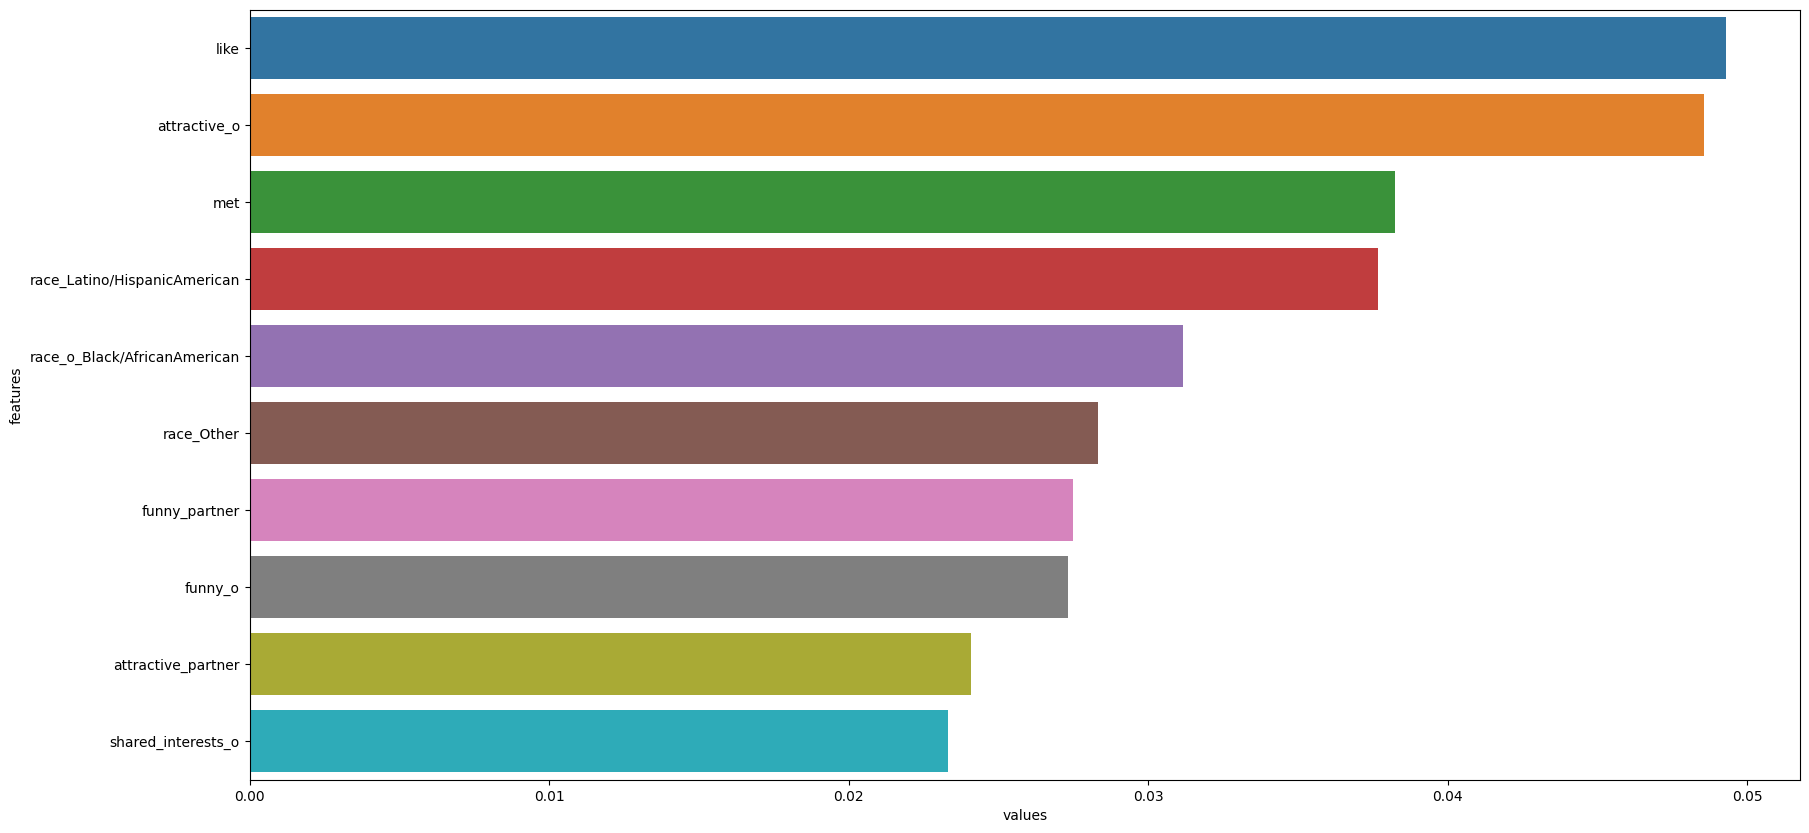

In [ ]:

feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_}) # 데이터프레임으로 변환
plt.figure(figsize=(20, 10)) # 그래프 크기 설정
sns.barplot(x='values', y='features',
data=feature_imp.sort_values(by='values', ascending=False).head(10))
